In [2]:
import pickle
import numpy as np
rna_emb_path = '/raid/home/yoyowu/spatialpro/prediction/spatial_liver_rna_embeddings.pickle'
protein_emb_path = '/raid/home/yoyowu/spatialpro/prediction/spatial_protein_embeddings.pickle'
RNA_path='/raid/home/yoyowu/spatialpro/data/HTAPP/liver_rna_wID.h5ad'
Pro_path = '/raid/home/yoyowu/spatialpro/data/HTAPP/liver_mar12_protein_w_ID.h5ad'
with open(rna_emb_path, 'rb') as handle:
    rna_embeddings = pickle.load(handle)
with open(protein_emb_path, 'rb') as handle:
    protein_embeddings = pickle.load(handle)
sim_matrix = np.dot(rna_embeddings, protein_embeddings.T)





/home/yoyowu/miniconda3/envs/performer/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Top-0.1% Accuracy: 0.6595966063710581
Top-0.2% Accuracy: 0.7145029614214823
Top-0.5% Accuracy: 0.8895469825516248
Top-1.0% Accuracy: 0.9434928765807588
Top-1.5% Accuracy: 0.9592604450136065
Top-2.0% Accuracy: 0.9839122778933889
Top-2.5% Accuracy: 0.9928765807587642


TypeError: 'Spine' object is not subscriptable

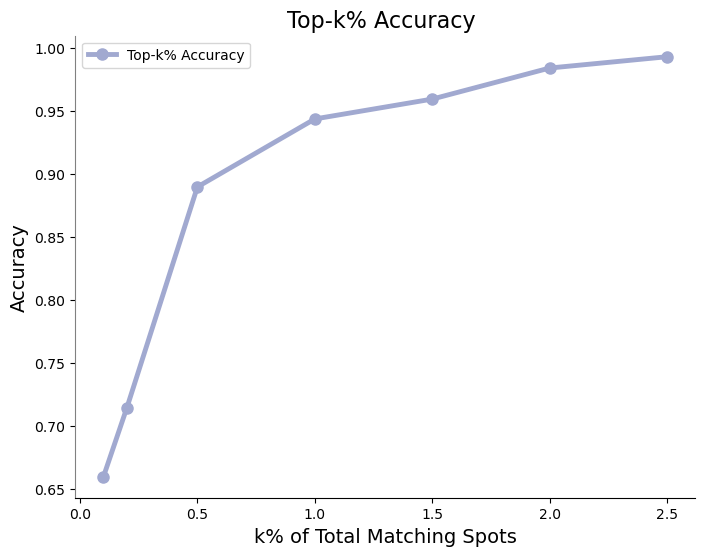

In [6]:
import matplotlib.pyplot as plt
import scanpy as sc
scRNA_adata = sc.read_h5ad(RNA_path)
scP_adata = sc.read_h5ad(Pro_path)
train_cell_types_rna = scRNA_adata.obs["cell_type"].tolist()
train_cell_types_protein = scP_adata.obs["OT"].tolist() # OR

def top_k_accuracy(sim_matrix, true_labels, candidate_labels, k):
    top_k_indices = np.argsort(-sim_matrix, axis=1)[:, :k]
    matches = [
        true_labels[i] in np.array(candidate_labels)[top_k_indices[i]]
        for i in range(len(true_labels))
    ]
    return np.mean(matches)

# Calculate top-k accuracy for percentages between 0.1% and 1%
percentages = [0.1, 0.2, 0.5,  1.0, 1.5, 2.0, 2.5]  # Fine-grained percentages
total_spots = sim_matrix.shape[1]  # Total number of spots
accuracies = []

for percentage in percentages:
    k = max(1, int(total_spots * (percentage / 100)))  # Ensure k is at least 1
    top_k_acc = top_k_accuracy(sim_matrix, train_cell_types_rna, train_cell_types_protein, k=k)
    accuracies.append(top_k_acc)
    print(f"Top-{percentage}% Accuracy: {top_k_acc}")

# Plot the accuracy curve
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracies, marker='o', label='Top-k% Accuracy', color='#a1a9d0' , linewidth=3.5, markersize=8)
plt.xlabel('k% of Total Matching Spots', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Top-k% Accuracy ', fontsize=16)
plt.grid(False)
plt.legend()

# Set frame color to grey
ax = plt.gca()  # Get current axes
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for spine in ax.spines.values():
    spine.set_color('grey')
    spine['top'].set_visible(False)
    spine['right'].set_visible(False)
    spine.set_linewidth(1)  # Optional: adjust line width
#save the plot 
plt.savefig('/raid/home/yoyowu/scProSpatial/plots/liver_topk', dpi=300, bbox_inches='tight')
plt.show()

/home/yoyowu/miniconda3/envs/performer/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Top-0.1% Accuracy: 0.6603690685413005
Top-0.2% Accuracy: 0.687609841827768
Top-0.5% Accuracy: 0.7038664323374341
Top-1.0% Accuracy: 0.7130931458699473
Top-1.5% Accuracy: 0.8536906854130053
Top-2.0% Accuracy: 0.9481546572934973
Top-2.5% Accuracy: 0.9797891036906854


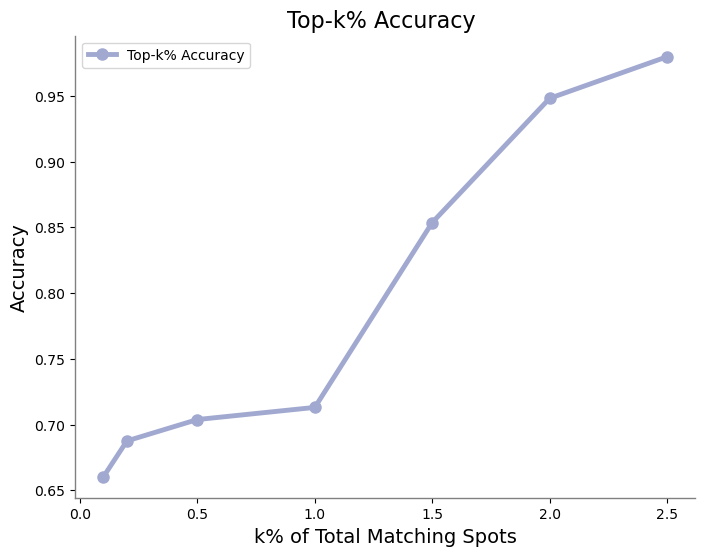

In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
rna_emb_path = '/raid/home/yoyowu/spatialpro/prediction/spatial_breast_rna_embeddings.pickle'
protein_emb_path = '/raid/home/yoyowu/spatialpro/prediction/spatial_breast_protein_embeddings.pickle'
RNA_path='/raid/home/yoyowu/spatialpro/data/HTAPP/brst_rna_wID.h5ad'
Pro_path = '/raid/home/yoyowu/spatialpro/data/HTAPP/breast_mar12_protein_w_ID.h5ad'
with open(rna_emb_path, 'rb') as handle:
    rna_embeddings = pickle.load(handle)
with open(protein_emb_path, 'rb') as handle:
    protein_embeddings = pickle.load(handle)
sim_matrix = np.dot(rna_embeddings, protein_embeddings.T)


scRNA_adata = sc.read_h5ad(RNA_path)
scP_adata = sc.read_h5ad(Pro_path)
train_cell_types_rna = scRNA_adata.obs["cell_type"].tolist()
train_cell_types_protein = scP_adata.obs["RCTD"].tolist() # OR

def top_k_accuracy(sim_matrix, true_labels, candidate_labels, k):
    top_k_indices = np.argsort(-sim_matrix, axis=1)[:, :k]
    matches = [
        true_labels[i] in np.array(candidate_labels)[top_k_indices[i]]
        for i in range(len(true_labels))
    ]
    return np.mean(matches)

# Calculate top-k accuracy for percentages between 0.1% and 1%
percentages = [0.1, 0.2, 0.5,  1.0, 1.5, 2.0, 2.5]  # Fine-grained percentages
total_spots = sim_matrix.shape[1]  # Total number of spots
accuracies = []

for percentage in percentages:
    k = max(1, int(total_spots * (percentage / 100)))  # Ensure k is at least 1
    top_k_acc = top_k_accuracy(sim_matrix, train_cell_types_rna, train_cell_types_protein, k=k)
    accuracies.append(top_k_acc)
    print(f"Top-{percentage}% Accuracy: {top_k_acc}")

# Plot the accuracy curve
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracies, marker='o', label='Top-k% Accuracy', color='#a1a9d0' , linewidth=3.5, markersize=8)
plt.xlabel('k% of Total Matching Spots', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Top-k% Accuracy ', fontsize=16)
plt.grid(False)
plt.legend()

# Set frame color to grey
ax = plt.gca()  # Get current axes
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for spine in ax.spines.values():
    spine.set_color('grey')
    spine.set_linewidth(1)  # Optional: adjust line width
#save the plot 
plt.savefig('/raid/home/yoyowu/scProSpatial/plots/breast_topk', dpi=300, bbox_inches='tight')
plt.show()

/home/yoyowu/miniconda3/envs/performer/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Top-0.1% Accuracy: 0.8196809740309778
Top-0.2% Accuracy: 0.8914232873545503
Top-0.5% Accuracy: 0.9756492255529012
Top-1.0% Accuracy: 0.9892116822069816
Top-1.5% Accuracy: 0.989596979271018
Top-2.0% Accuracy: 0.9902905139862834
Top-2.5% Accuracy: 0.9916005240040071


TypeError: 'Spine' object is not subscriptable

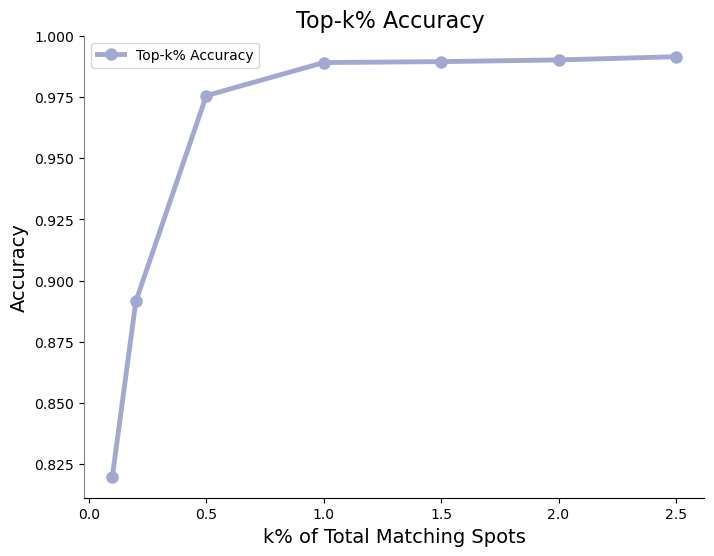

In [14]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
rna_emb_path = '/raid/home/yoyowu/spatialpro/prediction/spatial_tonsil_rna_embeddings.pickle'
protein_emb_path = '/raid/home/yoyowu/spatialpro/prediction/spatial_tonsil_protein_embeddings.pickle'
RNA_path='/raid/home/yoyowu/spatialpro/data/CODEX/tonsil/rna_w_ID.h5ad'
Pro_path = '/raid/home/yoyowu/spatialpro/data/CODEX/tonsil/mar12_protein_w_ID.h5ad'
with open(rna_emb_path, 'rb') as handle:
    rna_embeddings = pickle.load(handle)
with open(protein_emb_path, 'rb') as handle:
    protein_embeddings = pickle.load(handle)
sim_matrix = np.dot(rna_embeddings, protein_embeddings.T)


scRNA_adata = sc.read_h5ad(RNA_path)
scP_adata = sc.read_h5ad(Pro_path)
train_cell_types_rna = scRNA_adata.obs["cell_type"].tolist()
train_cell_types_protein = scP_adata.obs["cell_type"].tolist() # OR

def top_k_accuracy(sim_matrix, true_labels, candidate_labels, k):
    top_k_indices = np.argsort(-sim_matrix, axis=1)[:, :k]
    matches = [
        true_labels[i] in np.array(candidate_labels)[top_k_indices[i]]
        for i in range(len(true_labels))
    ]
    return np.mean(matches)

# Calculate top-k accuracy for percentages between 0.1% and 1%
percentages = [0.1, 0.2, 0.5,  1.0, 1.5, 2.0, 2.5]  # Fine-grained percentages
total_spots = sim_matrix.shape[1]  # Total number of spots
accuracies = []

for percentage in percentages:
    k = max(1, int(total_spots * (percentage / 100)))  # Ensure k is at least 1
    top_k_acc = top_k_accuracy(sim_matrix, train_cell_types_rna, train_cell_types_protein, k=k)
    accuracies.append(top_k_acc)
    print(f"Top-{percentage}% Accuracy: {top_k_acc}")

# Plot the accuracy curve
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracies, marker='o', label='Top-k% Accuracy', color='#a1a9d0' , linewidth=3.5, markersize=8)
plt.xlabel('k% of Total Matching Spots', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Top-k% Accuracy ', fontsize=16)
plt.grid(False)
plt.legend()

# Set frame color to grey
ax = plt.gca()  # Get current axes
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for spine in ax.spines.values():
    spine.set_color('grey')
    spine['top'].set_visible(False)
    spine['right'].set_visible(False)
    spine.set_linewidth(1)  # Optional: adjust line width
#save the plot 
plt.savefig('/raid/home/yoyowu/scProSpatial/plots/tonsil_topk', dpi=300, bbox_inches='tight')
plt.show()

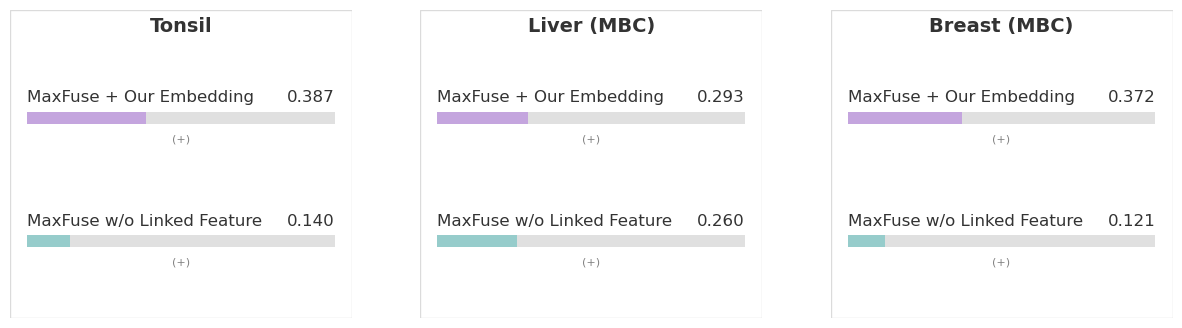

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

# --- Data ---
# The results were extracted from MaxFuse log


maxfuse_data = {
    'Tonsil': {'with_embedding': 0.387, 'without_linked': 0.140},
    'Liver (MBC)': {'with_embedding': 0.293, 'without_linked': 0.260},
    'Breast (MBC)': {'with_embedding': 0.372, 'without_linked': 0.121}
}

# --- Color Scheme ---
# Main colors used for card elements, text, etc.
colors = {
    'background': "#ffffff",
    'card': "#ffffff",
    'text': "#333333",
    'progress_bg': "#e0e0e0"
    # Add specific metric colors below if needed, or use a separate dict
}

# Specific colors for MaxFuse metrics
maxfuse_colors = {
    'with_embedding': "#c4a5de",  # Example color (Purple-ish)
    'without_linked': "#96cccb",  # Example color (Teal-ish)
}

# --- Plotting ---
# Create figure with a 1x3 grid for the three dataset cards
fig, axes = plt.subplots(1, 3, figsize=(15, 4), facecolor=colors['background'])
plt.subplots_adjust(wspace=0.2) # Adjust horizontal spacing between cards

# # Set overall title for the figure
# fig.suptitle('MaxFuse Performance Comparison\nAcross Different Datasets)', # Added clarification
#              fontsize=16, fontweight='bold', y=1.02) # Adjust y slightly for better spacing

# Create a dataset card for each MaxFuse dataset
for i, (dataset, metrics) in enumerate(maxfuse_data.items()):
    ax = axes[i] # Correctly select the subplot axis

    # Set up the card background
    ax.add_patch(Rectangle((0, 0), 1, 1, facecolor=colors['card'], edgecolor='lightgray',
                           linewidth=1, zorder=0, alpha=1.0))

    # Set dataset title
    ax.text(0.5, 0.93, dataset, fontsize=14, ha='center', color=colors['text'])

    # Display metrics using the style of the first plot
    # Adjusted y_positions for two metrics
    y_positions = [0.65, 0.25]
    metric_names = ['MaxFuse + Our Embedding', 'MaxFuse w/o Linked Feature']
    metric_keys = ['with_embedding', 'without_linked']

    for j, (y_pos, name, key) in enumerate(zip(y_positions, metric_names, metric_keys)):
        # Add metric name
        ax.text(0.05, y_pos + 0.05, name, fontsize=12, ha='left', color=colors['text'])

        # Add metric value
        ax.text(0.95, y_pos + 0.05, f'{metrics[key]:.3f}', fontsize=12, ha='right', color=colors['text'])

        # Add progress bar background (using the style from the first plot)
        ax.add_patch(Rectangle((0.05, y_pos-0.02), 0.9, 0.04,
                                facecolor=colors['progress_bg'], edgecolor=None, zorder=1))

        # Add progress bar (assuming higher is better for these metrics)
        # Scale the value directly to the bar width (0.0 to 1.0 maps to 0% to 100% of bar width)
        # Cap the value at 1.0 for safety, although data is lower here.
        # We use 0.9 multiplier because the background bar has width 0.9
        scaled_width = min(metrics[key], 1.0) * 0.9
        ax.add_patch(Rectangle((0.05, y_pos-0.02), scaled_width, 0.04,
                                facecolor=maxfuse_colors[key], edgecolor=None, zorder=2))

        # Add indicator that higher is better (+) like in the first plot
        ax.text(0.5, y_pos - 0.08, "(+)", fontsize=8, ha='center', color='gray')

    # Add metric explanations at the bottom (only in the first card)
    # if i == 0:
    #     # Adjust y positions for explanations
    #     ax.text(0.05, 0.18, "Matching Acc.",
    #             fontsize=7, ha='left', wrap=True, color=colors['text'])
    #     ax.text(0.05, 0.11, "'Our Embedding': Using embeddings from the CLIP-trained model.",
    #             fontsize=7, ha='left', wrap=True, color=colors['text'])
    #     ax.text(0.05, 0.04, "'w/o Linked Feature': MaxFuse baseline without external features.",
    #             fontsize=7, ha='left', wrap=True, color=colors['text'])


    # Remove axis ticks and labels, set limits
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Save or show the figure
plt.savefig('/raid/home/yoyowu/spatialpro/plots/maxfuse_performance_cards.png', dpi=300, bbox_inches='tight', facecolor=colors['background'])
plt.show()

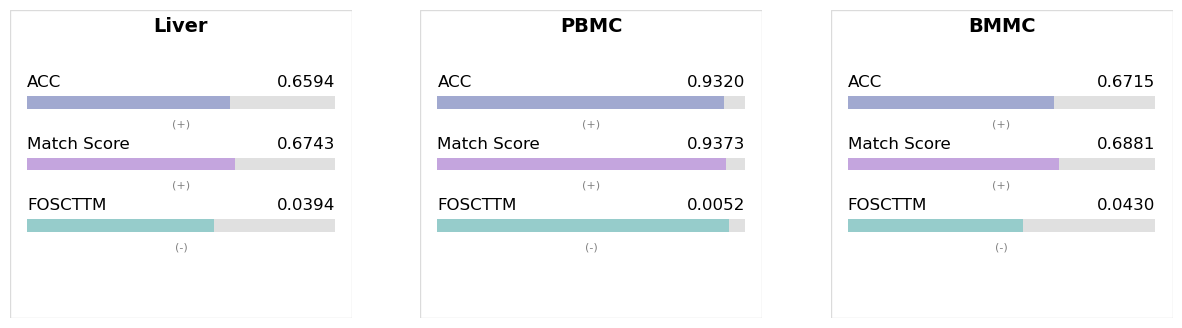

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

# Model performance data
# please run train_cip.py to generate the result
data = {
    'Liver': {'acc': 0.65945, 'foscttm': 0.0394, 'match_score': 0.67429},
    'PBMC': {'acc': 0.932, 'foscttm': 0.0052, 'match_score': 0.93731},
    'BMMC': {'acc': 0.6715, 'foscttm': 0.043, 'match_score': 0.6881}
}

# Color scheme
colors = {
    'acc': "#a1a9d0",
    'foscttm': "#96cccb",
    'match_score': "#c4a5de",
    'background': "#ffffff",
    'card': "#ffffff",
    'text': "#333333",
    'progress_bg': "#e0e0e0"
}

# Create figure with a 1x3 grid for the three dataset cards
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
plt.subplots_adjust(wspace=0.2)

# # Set overall title for the figure
# fig.suptitle('Model Performance on One-to-One Matching\nLatent Space after CLIP Training (Test Results on Hold-out Set)', 
#              fontsize=16, fontweight='bold', y=0.98)

# Create a dataset card for each dataset
for i, (dataset, metrics) in enumerate(data.items()):
    ax = axes[i]
    
    # Set up the card background
    ax.add_patch(Rectangle((0, 0), 1, 1, facecolor=colors['card'], edgecolor='lightgray', 
                           linewidth=1, zorder=0, alpha=1.0))
    
    # Set dataset title
    ax.text(0.5, 0.93, dataset, fontsize=14, fontweight='bold', ha='center')
    
    # Display metrics with progress bars
    y_positions = [0.7, 0.5, 0.3]
    metric_names = ['ACC', 'Match Score', 'FOSCTTM']
    metric_keys = ['acc', 'match_score', 'foscttm']
    
    for j, (y_pos, name, key) in enumerate(zip(y_positions, metric_names, metric_keys)):
        # Add metric name
        ax.text(0.05, y_pos + 0.05, name, fontsize=12, ha='left')
        
        # Add metric value
        ax.text(0.95, y_pos + 0.05, f'{metrics[key]:.4f}', fontsize=12, ha='right')
        
        # Add progress bar background
        ax.add_patch(Rectangle((0.05, y_pos-0.02), 0.9, 0.04, 
                                facecolor=colors['progress_bg'], edgecolor=None, zorder=1))
        
        # Add progress bar (scaled differently for FOSCTTM since lower is better)
        if key == 'foscttm':
            # For FOSCTTM, lower is better, so we invert the scale
            # We'll use a scale where 0 fills the bar 100% and 0.1 or higher fills 0%
            scaled_width = max(0, min(1, 1 - metrics[key] * 10))
            ax.text(0.5, y_pos - 0.08, "(-)", fontsize=8, ha='center', color='gray')
        else:
            # For ACC and Match Score, higher is better
            scaled_width = metrics[key]
            ax.text(0.5, y_pos - 0.08, "(+)", fontsize=8, ha='center', color='gray')
            
        ax.add_patch(Rectangle((0.05, y_pos-0.02), scaled_width * 0.9, 0.04, 
                                facecolor=colors[key], edgecolor=None, zorder=2))
    
    # # Add metric explanations at the bottom
    # if i == 0:  # Only add explanations in the first card to avoid repetition
    #     ax.text(0.05, 0.15, "ACC: Accuracy of one-to-one matching", fontsize=7, ha='left', wrap=True)
    #     ax.text(0.05, 0.10, "FOSCTTM: First Order Statistics discrepancy", fontsize=7, ha='left', wrap=True)
    #     ax.text(0.05, 0.05, "Match Score: Overall matching quality", fontsize=7, ha='left', wrap=True)
    
    # Remove axis ticks and labels
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Save the figure
plt.savefig('/raid/home/yoyowu/spatialpro/plots/clip_perf_cards.png', dpi=300, bbox_inches='tight', facecolor=colors['background'])
plt.show()


